# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import pprint
from scipy.stats import linregress
import datetime as dt
import scipy.stats as st
import os

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
output_log_file = "output_data/cities.log"

# only call openweather if we want to - delete to file to enable
if os.path.exists(output_data_file):
    skip_weather = True
    print("*** Using existing data ***")
else:
    skip_weather = False
    print("*** Getting new data ***")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Current date
d = dt.date.today()
analysis_date = (f"({d.month}/{d.day}/{d.year})")
print(analysis_date)

max_limit = 1000
required_length = 450

*** Getting new data ***
(1/22/2020)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
i = 0
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    i+=1
    if i > max_limit:
        break

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
length = len(cities)
print(length)

if length < required_length:
    raise Exception(f"not enough cities: {length}: need: {required_length}")

458


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# TODO: make a def
# city_name = short_cities[0]
# url = f"https://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={weather_api_key}"
# print(url)

# redefine params
# params = {
#     "q": city_name,
#     "appid": weather_api_key
# }

# Build URL using the Google Maps API
base_url = "https://api.openweathermap.org/data/2.5/weather"
#print(cities)
# Run request
# response = requests.get(base_url, params).json()

'''We only need these
City	Cloudiness	Country	Date	Humidity	Lat	Lng	Max Temp	Wind Speed'''

if skip_weather == True:
    df = pd.read_csv(output_data_file)
else:
    i = 1
    df = pd.DataFrame()
    ind = []

    log = open(output_log_file, "w")
    try:
        for city_name in cities:
            try:
                url = f"https://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={weather_api_key}"
                response = requests.get(url).json()
                log.write("")
                #print("==============================")
                print(f"Processing City city {i} with name: {city_name}")
                log.write("==============================")
                log.write(f"Processing City city {i} with name: {city_name}")
                # json.dumps(response, indent=4, sort_keys=True)
                pprint.pprint(response, log)
                log.write("")

                # extract the data
                ind.append(i-1) # the index for the DataFrame in case we want to change it later
                cloudiness = response['clouds']['all']
                country = response['sys']['country']
                date = response['dt']
                humidity = response['main']['humidity']
                lat = response['coord']['lat']
                lng = response['coord']['lon']
                kmax_temp = response['main']['temp_max']
                max_temp = ((kmax_temp * (9/5)) - 459.67)
                kwind_speed = response['wind']['speed']
                wind_speed = kwind_speed * 1.6

                data = [city_name, cloudiness, country, date, humidity, lat, lng, max_temp, wind_speed]
                print(data)
                s = pd.Series(data)
                df = df.append(s, ignore_index=True)

                i+=1
            except(KeyError):
                print(f"Error on city {city_name}, skipping")
    finally:
        log.close()
    df.columns = ['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed']
    df['Date'] = df['Date'].apply(np.int64)

#print(df.dtypes)
df.head()


Processing City city 1 with name: byron bay
['byron bay', 100, 'AU', 1579737302, 83, -28.65, 153.62, 87.99799999999999, 11.520000000000001]
Processing City city 2 with name: nikolskoye
['nikolskoye', 20, 'RU', 1579737127, 54, 59.7, 30.79, 28.399999999999977, 16.0]
Processing City city 3 with name: port alfred
['port alfred', 80, 'ZA', 1579737466, 97, -33.59, 26.89, 62.00600000000003, 1.4240000000000002]
Processing City city 4 with name: fairbanks
['fairbanks', 75, 'US', 1579737189, 76, 64.84, -147.72, -7.006000000000029, 0.35200000000000004]
Processing City city 5 with name: atuona
['atuona', 17, 'PF', 1579737449, 73, -9.8, -139.03, 81.13999999999993, 8.224]
Processing City city 6 with name: kitimat
['kitimat', 90, 'CA', 1579737467, 95, 54.05, -128.65, 33.99799999999999, 3.3600000000000003]
Processing City city 7 with name: punta arenas
['punta arenas', 100, 'CL', 1579737126, 71, -53.15, -70.92, 51.799999999999955, 9.120000000000001]
Processing City city 8 with name: derzhavinsk
['derz

Processing City city 59 with name: obo
['obo', 58, 'CF', 1579737485, 22, 5.4, 26.49, 65.83999999999997, 4.960000000000001]
Processing City city 60 with name: rawson
['rawson', 30, 'AR', 1579737485, 69, -43.3, -65.1, 67.42399999999992, 9.536]
Processing City city 61 with name: ancud
['ancud', 52, 'CL', 1579737486, 64, -41.87, -73.82, 67.99999999999994, 6.56]
Processing City city 62 with name: flinders
['flinders', 72, 'AU', 1579737334, 10, -34.58, 150.86, 98.99600000000004, 14.880000000000003]
Processing City city 63 with name: illoqqortoormiut
Error on city illoqqortoormiut, skipping
Processing City city 63 with name: vila franca do campo
['vila franca do campo', 75, 'PT', 1579737487, 76, 37.72, -25.43, 55.39999999999992, 4.16]
Processing City city 64 with name: novomyrhorod
['novomyrhorod', 94, 'UA', 1579737487, 78, 48.78, 31.64, 31.676000000000045, 12.496]
Processing City city 65 with name: ye
Error on city ye, skipping
Processing City city 65 with name: chokurdakh
['chokurdakh', 100

Processing City city 120 with name: san roque
['san roque', 99, 'ES', 1579737506, 87, 36.21, -5.38, 55.39999999999992, 4.960000000000001]
Processing City city 121 with name: shubarkuduk
['shubarkuduk', 100, 'KZ', 1579737506, 92, 49.14, 56.49, 31.56800000000004, 12.432]
Processing City city 122 with name: iqaluit
['iqaluit', 40, 'CA', 1579737507, 68, 63.75, -68.51, -20.00200000000001, 1.568]
Processing City city 123 with name: vostok
['vostok', 43, 'RU', 1579737507, 90, 46.49, 135.88, 0.1220000000000141, 2.9920000000000004]
Processing City city 124 with name: santiago del estero
['santiago del estero', 0, 'AR', 1579737268, 46, -27.8, -64.26, 80.762, 7.056000000000001]
Processing City city 125 with name: ponta do sol
['ponta do sol', 20, 'PT', 1579737127, 62, 32.67, -17.1, 55.39999999999992, 4.16]
Processing City city 126 with name: zholymbet
['zholymbet', 100, 'KZ', 1579737508, 89, 51.74, 71.71, 24.368000000000052, 22.528000000000002]
Processing City city 127 with name: kurilsk
['kurils

Processing City city 181 with name: zhezkazgan
['zhezkazgan', 100, 'KZ', 1579737530, 92, 47.8, 67.71, 25.033999999999935, 19.536]
Processing City city 182 with name: belushya guba
Error on city belushya guba, skipping
Processing City city 182 with name: kruisfontein
['kruisfontein', 100, 'ZA', 1579737530, 90, -34, 24.73, 61.61000000000007, 3.9520000000000004]
Processing City city 183 with name: havelock
['havelock', 1, 'US', 1579737235, 56, 34.88, -76.9, 44.599999999999966, 11.520000000000001]
Processing City city 184 with name: muros
['muros', 40, 'ES', 1579737531, 100, 42.78, -9.06, 53.00600000000003, 2.4000000000000004]
Processing City city 185 with name: aranos
['aranos', 42, 'NA', 1579737532, 23, -24.13, 19.12, 77.37799999999999, 7.248000000000001]
Processing City city 186 with name: abu kamal
['abu kamal', 47, 'SY', 1579737532, 60, 34.45, 40.92, 43.573999999999955, 9.136000000000001]
Processing City city 187 with name: faanui
['faanui', 100, 'PF', 1579737533, 75, -16.48, -151.75,

Processing City city 240 with name: upernavik
['upernavik', 100, 'GL', 1579737361, 93, 72.79, -56.15, 0.589999999999975, 5.904]
Processing City city 241 with name: kapustin yar
['kapustin yar', 100, 'RU', 1579737555, 98, 48.58, 45.74, 33.386000000000024, 10.528]
Processing City city 242 with name: ahipara
['ahipara', 81, 'NZ', 1579737555, 56, -35.17, 173.17, 89.99600000000004, 0.7200000000000001]
Processing City city 243 with name: jatara
['jatara', 0, 'IN', 1579737555, 68, 25.02, 79.05, 50.19799999999998, 3.5840000000000005]
Processing City city 244 with name: hasaki
['hasaki', 75, 'JP', 1579737556, 86, 35.73, 140.83, 39.19999999999993, 0.8]
Processing City city 245 with name: samalaeulu
Error on city samalaeulu, skipping
Processing City city 245 with name: airai
['airai', 32, 'TL', 1579737558, 65, -8.93, 125.41, 76.15400000000005, 1.4240000000000002]
Processing City city 246 with name: osmena
['osmena', 45, 'PH', 1579737558, 77, 10.52, 119.93, 79.55599999999998, 17.376]
Processing Ci

Processing City city 300 with name: asau
['asau', 90, 'RO', 1579737580, 64, 46.43, 26.4, 37.39999999999998, 9.920000000000002]
Processing City city 301 with name: mahibadhoo
['mahibadhoo', 87, 'MV', 1579737581, 81, 3.78, 72.97, 82.65199999999999, 15.824000000000002]
Processing City city 302 with name: asyut
['asyut', 0, 'EG', 1579737581, 65, 27.18, 31.18, 46.39999999999998, 4.16]
Processing City city 303 with name: meulaboh
['meulaboh', 0, 'ID', 1579737581, 80, 4.14, 96.13, 80.78000000000003, 5.008]
Processing City city 304 with name: wairoa
['wairoa', 1, 'NZ', 1579737582, 66, -39.03, 177.37, 75.00200000000001, 4.288]
Processing City city 305 with name: magdagachi
['magdagachi', 100, 'RU', 1579737582, 97, 53.45, 125.8, -12.927999999999997, 4.144]
Processing City city 306 with name: timbo
['timbo', 75, 'BR', 1579737583, 88, -26.82, -49.27, 69.99799999999999, 4.16]
Processing City city 307 with name: rio gallegos
['rio gallegos', 90, 'AR', 1579737583, 66, -51.62, -69.22, 51.7999999999999

Processing City city 361 with name: wittenberge
['wittenberge', 24, 'DE', 1579737602, 85, 53, 11.75, 42.99799999999999, 0.7200000000000001]
Processing City city 362 with name: takoradi
['takoradi', 82, 'GH', 1579737565, 86, 4.88, -1.76, 78.83600000000007, 2.192]
Processing City city 363 with name: high level
['high level', 90, 'CA', 1579737603, 92, 58.52, -117.14, 17.599999999999966, 2.4000000000000004]
Processing City city 364 with name: ustupo
['ustupo', 94, 'PA', 1579737603, 90, 9.13, -77.93, 73.00399999999996, 1.952]
Processing City city 365 with name: umzimvubu
Error on city umzimvubu, skipping
Processing City city 365 with name: poum
['poum', 17, 'NC', 1579737604, 72, -20.23, 164.02, 79.79000000000002, 9.056000000000001]
Processing City city 366 with name: nantucket
['nantucket', 1, 'US', 1579737308, 68, 41.28, -70.1, 31.999999999999943, 5.168]
Processing City city 367 with name: ruatoria
Error on city ruatoria, skipping
Processing City city 367 with name: kamenskoye
Error on cit

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,byron bay,100.0,AU,1579737302,83.0,-28.65,153.62,87.998,11.520
1,nikolskoye,20.0,RU,1579737127,54.0,59.70,30.79,28.400,16.000
2,port alfred,80.0,ZA,1579737466,97.0,-33.59,26.89,62.006,1.424
3,fairbanks,75.0,US,1579737189,76.0,64.84,-147.72,-7.006,0.352
4,atuona,17.0,PF,1579737449,73.0,-9.80,-139.03,81.140,8.224


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
df.to_csv(output_data_file)

In [5]:
print(len(df))
df

413


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,byron bay,100.0,AU,1579737302,83.0,-28.65,153.62,87.998,11.520
1,nikolskoye,20.0,RU,1579737127,54.0,59.70,30.79,28.400,16.000
2,port alfred,80.0,ZA,1579737466,97.0,-33.59,26.89,62.006,1.424
3,fairbanks,75.0,US,1579737189,76.0,64.84,-147.72,-7.006,0.352
4,atuona,17.0,PF,1579737449,73.0,-9.80,-139.03,81.140,8.224
...,...,...,...,...,...,...,...,...,...
408,baruun-urt,0.0,MN,1579737644,83.0,46.68,113.28,-5.296,4.160
409,termoli,0.0,IT,1579737646,89.0,41.99,14.99,42.008,1.424
410,parsons,90.0,US,1579737647,93.0,37.34,-95.26,35.996,9.120
411,korla,100.0,CN,1579737127,55.0,41.76,86.15,16.268,0.912


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [6]:
# function to do each plot with different variables
def plot(pdf, x, y, title, xlabel, ylabel, regress = False, hem = ""):

    # Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
    # Annotate in the regression
    x_axis = pdf[x]
    y_axis = pdf[y]

    df.head(600)
#     plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
#                 s=x_axis, alpha=0.75)

    plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

    if regress:
        # Calculate the correlation coefficient and linear regression model for mouse weight and 
        # average tumor volume for the Capomulin regimen
        correlation = st.pearsonr(x_axis, y_axis)
        print(f"The correlation between both factors is {round(correlation[0],2)}")
        # get and add the regression
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
        regress_values = x_axis * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        plt.plot(x_axis,regress_values,"r-")
        x_mean = x_axis.mean()
        y_mean = y_axis.mean()
        plt.annotate(line_eq,(x_mean,y_mean),fontsize=15,color="black")

    plt.title(f"{title} {analysis_date}")
    plt.xlabel(f"{xlabel}")
    plt.ylabel(f"{ylabel}")
    if regress:
        l = "_r"
    else:
        l = ""
    
    xs = x.strip()
    ys = y.strip()
    plt.savefig(f"output_data/fig_{xs}_{ys}{l}{hem}.png")


#### Latitude vs. Temperature Plot

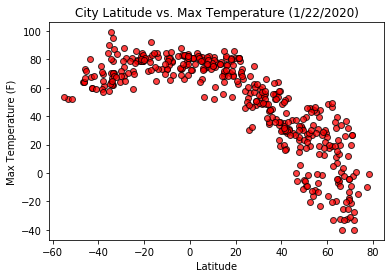

In [7]:
plot(df, 'Lat', 'Max Temp', "City Latitude vs. Max Temperature", 'Latitude', 'Max Temperature (F)')

This is giving evidence that the southern hemisphere is warmer at this time of year. Of course the temperature peaks at the equator.

#### Latitude vs. Humidity Plot

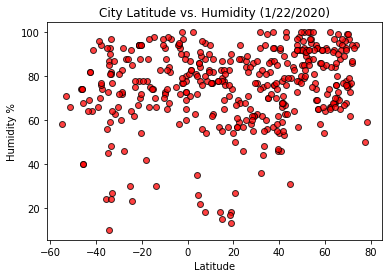

In [8]:
plot(df, 'Lat', 'Humidity', 'City Latitude vs. Humidity', 'Latitude', 'Humidity %')

This demonstrates that it is more humid in the northern hemisphere at this time of year.

#### Latitude vs. Cloudiness Plot

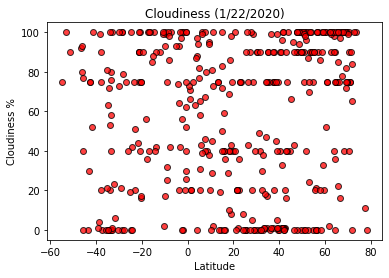

In [9]:
plot(df, 'Lat', 'Cloudiness', 'Cloudiness', 'Latitude', 'Cloudiness %')

This is looking to show a correlation between cloudiness and latitude, but it doesn't appear to.

#### Latitude vs. Wind Speed Plot

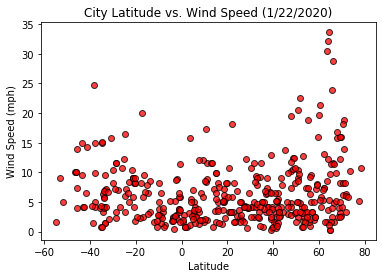

In [10]:
plot(df, 'Lat', 'Wind Speed', 'City Latitude vs. Wind Speed', 'Latitude', 'Wind Speed (mph)')

There could be an indication that there is more wind in the northern hemisphere.

## Linear Regression

In [11]:
# Create Northern and Southern Hemisphere DataFrames
ndf = df[df['Lat'] >= 0]
sdf = df[df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is -0.86


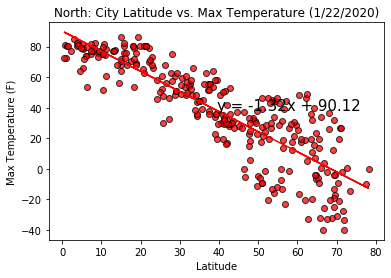

In [12]:
plot(ndf, 'Lat', 'Max Temp', "North: City Latitude vs. Max Temperature", 'Latitude', 'Max Temperature (F)', regress = True, hem = "_n")

The correlation quantifies the negative correlation between temp and latitude. The farther north you go, the colder it is.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is 0.49


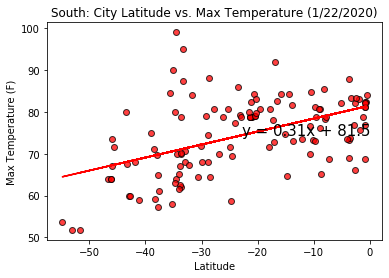

In [13]:
plot(sdf, 'Lat', 'Max Temp', "South: City Latitude vs. Max Temperature", 'Latitude', 'Max Temperature (F)', regress = True, hem = "_s")

In the south, the farther north you go, the warmer it gets.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.27


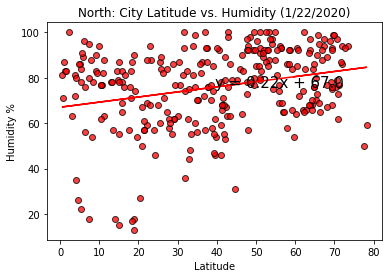

In [14]:
plot(ndf, 'Lat', 'Humidity', 'North: City Latitude vs. Humidity', 'Latitude', 'Humidity %', regress = True, hem = "_n")

There a slight positive correlation between humidity and latitude in the north. The farther north you go, it is slightly more humid.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.27


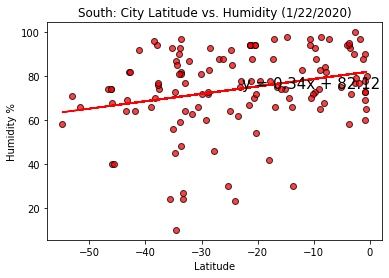

In [15]:
plot(sdf, 'Lat', 'Humidity', 'South: City Latitude vs. Humidity', 'Latitude', 'Humidity %', regress = True, hem = "_s")

There a slight positive correlation between humidity and latitude in the north. The farther north you go, it is slightly more humid.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.23


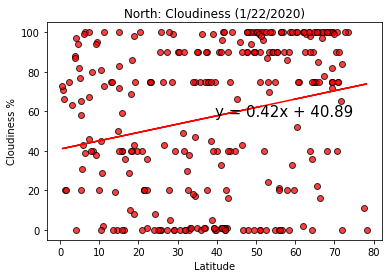

In [16]:
plot(ndf, 'Lat', 'Cloudiness', 'North: Cloudiness', 'Latitude', 'Cloudiness %', regress = True, hem = "_n")

There a slight positive correlation between cloudiness and latitude in the north. I don't see it.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.15


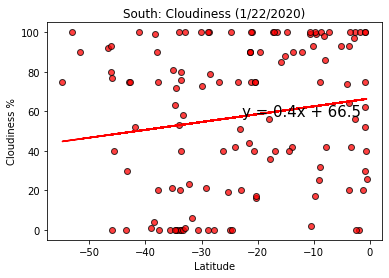

In [17]:
plot(sdf, 'Lat', 'Cloudiness', 'South: Cloudiness', 'Latitude', 'Cloudiness %', regress = True, hem = "_s")

In the south, there is no measurable correlation between cloudiness and latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is 0.27


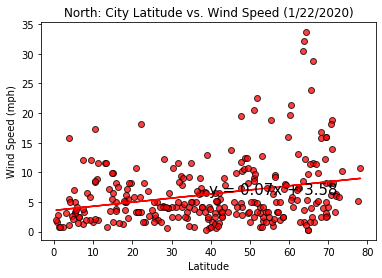

In [18]:
plot(ndf, 'Lat', 'Wind Speed', 'North: City Latitude vs. Wind Speed', 'Latitude', 'Wind Speed (mph)', regress = True, hem = "_n")

There are some interesting outliers in the north as far as wind speed. This gives a slight correlation.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.32


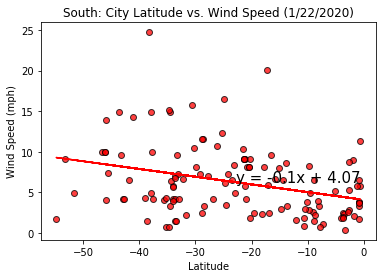

In [19]:
plot(sdf, 'Lat', 'Wind Speed', 'South: City Latitude vs. Wind Speed', 'Latitude', 'Wind Speed (mph)', regress = True, hem = "_s")

There are some interesting outliers in the south as far as wind speed. This gives a slight negative correlation, between wind speed and latitude.